In [2]:
import numpy as np
from scipy import special
from math import factorial as fact
import matplotlib.pyplot as plt
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['font.size'] = 15
plt.rcParams["axes.labelsize"] = 15

In [3]:
def exponential_comp(t, thetaT, sigma, a):
    """gives the stuffs in the exponential"""
    tplus = (t - thetaT + a/2) * sigma / np.sqrt(2)
    tminus = (t - thetaT - a/2) * sigma / np.sqrt(2)
    return tplus, tminus

def d_erf(t, thetaT, sigma, a):
    """delta error function"""
    tplus, tminus = exponential_comp(t, thetaT, sigma, a)
    d_erf = 0.5 * (special.erf(tplus) - special.erf(tminus))
    return d_erf

def mu(x, y, thetaX, thetaY, alpha, beta, theta_I0, a, theta_bg):
    """image model for gaussian psf"""
    d_erfX = d_erf(x, thetaX, alpha, a)
    d_erfY = d_erf(y, thetaY, beta, a)
    muK = theta_I0 * d_erfX * d_erfY + theta_bg*a**2
    return muK

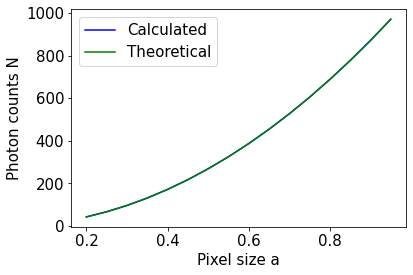

In [7]:
n = 20
alpha = 3
beta = 2
xmax = alpha*8
ymax = xmax
thetaX = (xmax-1)/2
thetaY = thetaX
thetabg = 1
N = 500

x,y = np.arange(xmax), np.arange(ymax)
xs, ys = np.meshgrid(x,y)

plt.rcParams["font.size"] = 15
a = np.arange(0.2,1,0.05)
m = [np.sum(mu(xs, ys, thetaX, thetaY, 1/alpha, 1/beta, N, a[i], thetabg)) for i in range(len(a))]
mT = a**2*thetabg*xmax**2+N*a**2
plt.plot(a,m,"b", label="Calculated")
plt.plot(a,mT,"g", label="Theoretical")
plt.xlabel("Pixel size a")
plt.ylabel("Photon counts N")
plt.legend()